In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
holidays_events = pd.read_csv("holidays_events.csv")
oil = pd.read_csv("oil.csv")
stores = pd.read_csv("stores.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
transactions = pd.read_csv("transactions.csv")

### Print heads of dataframes

In [8]:
print("holidays_events")
display(holidays_events.head())
print("\noil")
display(oil.head())
print("\nstores")
display(stores.head())
print("\ntrain")
display(train.head())
print("\ntransactions")
display(transactions.head())

holidays_events


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False



oil


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20



stores


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4



train


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0



transactions


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Describe dataframes

In [12]:
dataframes = {
    "holidays_events": holidays_events,
    "oil": oil,
    "train": train,
    "stores": stores,
    "transactions": transactions
    }

In [20]:
for key, dataframe in dataframes.items():
    print(dataframe.describe(include="all"))
    print(f"\n{key}\n\n")

              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338

holidays_events


              date   dcoilwtico
count         1218  1175.000000
unique        1218          NaN
top     2013-01-01          NaN
freq             1          NaN
mean           NaN    67.714366
std            NaN    25.630476
min            NaN    26.190000
25%            NaN    46.405000
50%            NaN    53.190000
75%            NaN    95.660000
max            NaN   110.620000

oil


                  id        date     store_nbr      family         sales  \
count   3.000888e+06     3000888  3.000888e+06     3000888  3.000888e+06   
unique           NaN        1684           NaN          33          

### infos

In [23]:
for key, dataframe in dataframes.items():
    print(dataframe.info())
    print(f"\n{key}\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

holidays_events


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

oil


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       ---

## Holydays events

In [24]:
holidays_events.shape

(350, 6)

In [26]:
holidays_events.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

## Oil

In [27]:
oil.shape

(1218, 2)

In [28]:
oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

In [34]:
oil['date'] = pd.to_datetime(oil['date'])
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


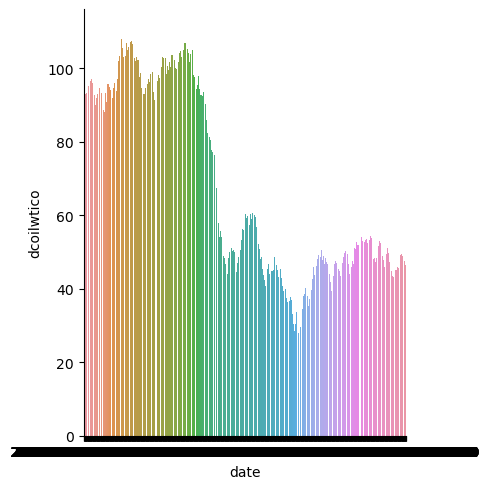

In [36]:
sns.catplot(data=oil, x="date", y="dcoilwtico", kind="bar")

remplacer les valeurs manquantes par la valeur la plus proche

### Stores

In [37]:
stores.shape

(54, 5)

In [39]:
stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [45]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [48]:
stores.city.unique()

array(['Quito', 'Santo Domingo', 'Cayambe', 'Latacunga', 'Riobamba',
       'Ibarra', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil', 'Salinas',
       'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad', 'Cuenca',
       'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

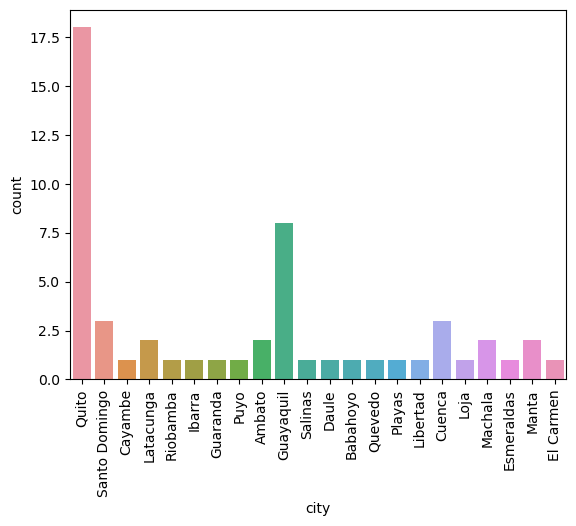

In [54]:
sns.countplot(data=stores, x="city")
plt.xticks(rotation = "vertical")
plt.show()

## train

In [55]:
train.shape

(3000888, 6)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [57]:
train.date = pd.to_datetime(train.date)

In [58]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

## Transactions

In [59]:
transactions.shape

(83488, 3)

In [60]:
transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [61]:
transactions.date = pd.to_datetime(transactions.date)

In [62]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [ ]:
sns.barplot(data=transactions, x="date", y="transactions")